# Importing required libraries


In [2]:
# Installing required libraries
!pip install numpy pandas matplotlib seaborn scikit-learn ipywidgets

# Import essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


# Loading dataset

In [4]:
df = pd.read_csv('heart.csv', header=0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Cleaning and Preprocessing

In [5]:
# Replace '?' with NaN (if any)
df.replace('?', np.nan, inplace=True)

# Convert numeric columns to proper dtype, coercing errors to NaN
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'thal' to numeric, fill missing with mode
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

# Fill any remaining NaNs in numeric columns with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values in 'ca' with mode (if any remain)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)

# Convert target to binary (0: no disease, 1: disease)
df['target'] = df['target'].apply(lambda x: 1 if int(x) > 0 else 0)

# Feature and Target Splitting

In [6]:
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (Random Forest)

In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

#Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation Metrics

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Feature Importance Plot

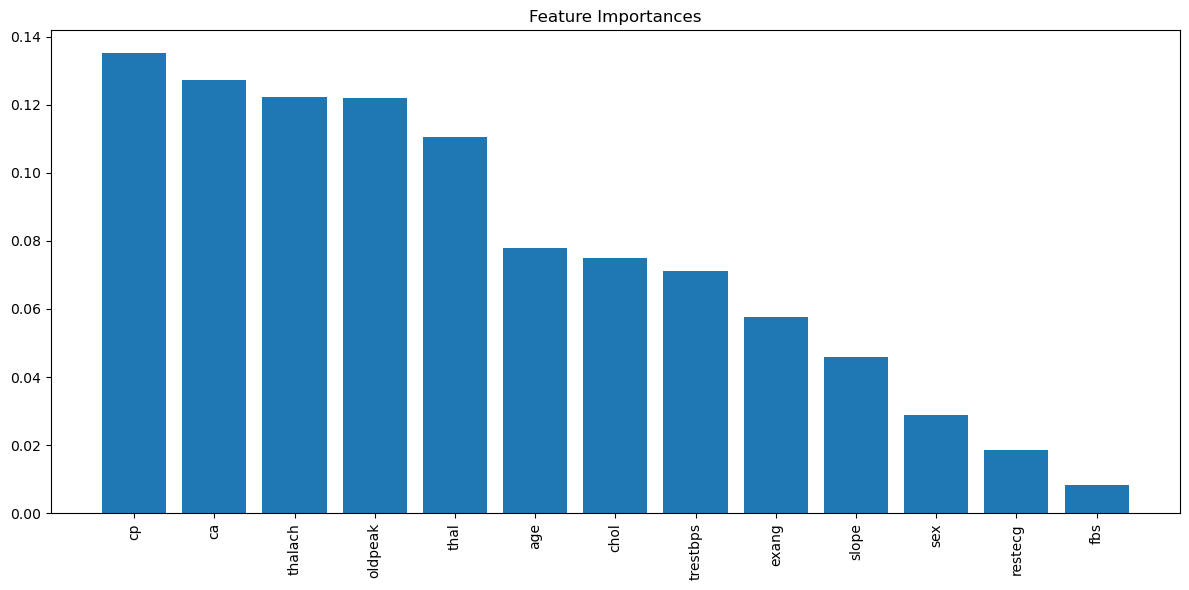

In [11]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Confusion Matrix Plot

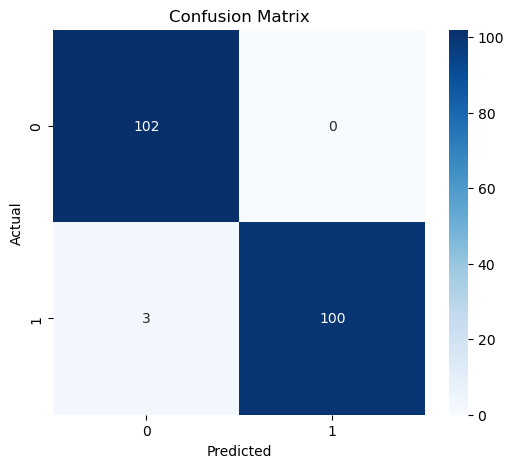

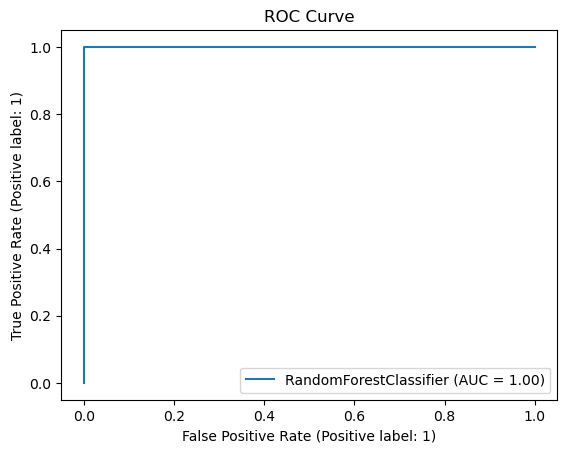

In [14]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
plt.title('ROC Curve')
plt.show()

#  Print Evaluation Summary

In [13]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", class_report)

Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Indian Business Impact Calculation for Heart Disease Prediction

In [15]:
# Parameters
population_screened = 10000  # Number of people screened
prevalence = 0.10            # 10% prevalence in urban adults
recall = 0.90                # Model recall (sensitivity)
preventable_fraction = 0.80  # 80% of detected cases preventable
cost_per_case = 350000       # Average treatment cost per case in INR

# Calculations
cases = population_screened * prevalence
cases_detected = cases * recall
cases_prevented = cases_detected * preventable_fraction
cost_savings = cases_prevented * cost_per_case


In [16]:
# Format output
calculation_summary = f"""
INDIAN BUSINESS IMPACT ANALYSIS

Population Screened: {population_screened:,}
Estimated Heart Disease Cases (Prevalence {prevalence*100:.0f}%): {cases:,.0f}
Cases Detected by Model (Recall {recall*100:.0f}%): {cases_detected:,.0f}
Cases Preventable with Early Intervention (80%): {cases_prevented:,.0f}
Average Treatment Cost per Case: ₹{cost_per_case:,}
Estimated Direct Healthcare Cost Savings: ₹{cost_savings:,} ({cost_savings/10000000:.2f} crore)

Additional Benefits:
- Prevents loss of productive years in working-age adults (15-20% of cases occur under 40)
- Reduces catastrophic health expenditure for families
- Aligns with India's National Health Mission for non-communicable disease control
"""

print(calculation_summary)


INDIAN BUSINESS IMPACT ANALYSIS

Population Screened: 10,000
Estimated Heart Disease Cases (Prevalence 10%): 1,000
Cases Detected by Model (Recall 90%): 900
Cases Preventable with Early Intervention (80%): 720
Average Treatment Cost per Case: ₹350,000
Estimated Direct Healthcare Cost Savings: ₹252,000,000.0 (25.20 crore)

Additional Benefits:
- Prevents loss of productive years in working-age adults (15-20% of cases occur under 40)
- Reduces catastrophic health expenditure for families
- Aligns with India's National Health Mission for non-communicable disease control

